## Import Libraries

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

## Import The Data

In [3]:
df = pd.read_csv('/Users/ramazansamilacak/Desktop/Data Scientist Salary/jobs_in_data.csv')

## General Information About Data

In [4]:
df.head(3)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M


In [5]:
df.shape

(9355, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [7]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [8]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

## Nan Values

In [9]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

## Data Analysis and Visualisation 

#### First of all, we can use this simple but very useful code to understand our numerical values and the correlation between them.

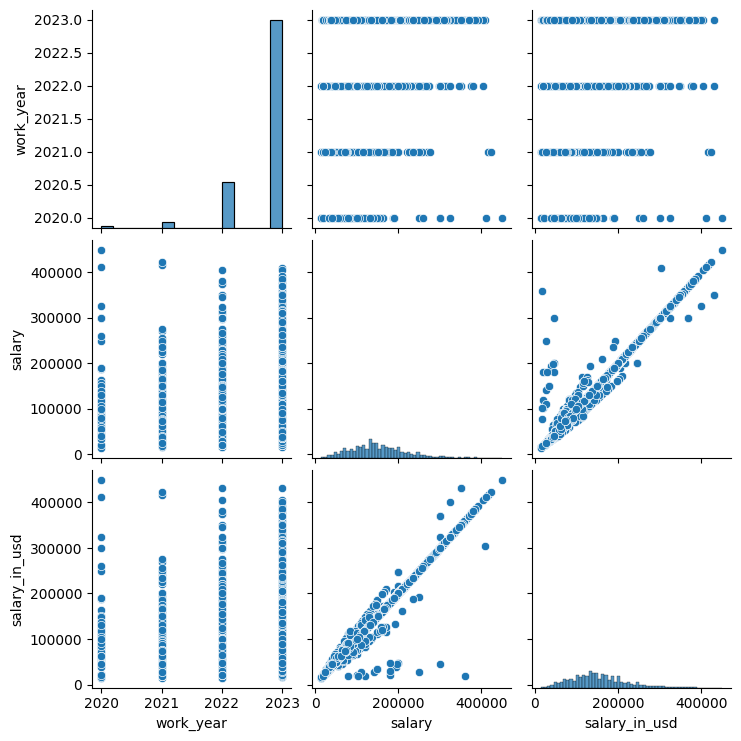

In [10]:
sns.pairplot(df)

### Work experience - salary relationship

In [11]:
average_salary_by_experience = df.groupby('experience_level')['salary'].mean().sort_values()
average_salary_by_experience

experience_level
Entry-level     89363.784274
Mid-level      115987.527555
Senior         162260.680578
Executive      188128.943060
Name: salary, dtype: float64

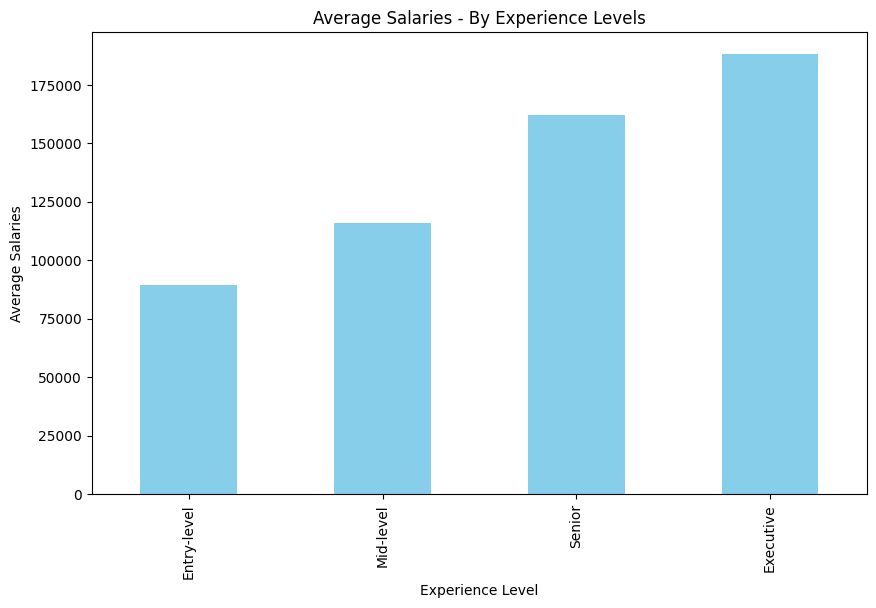

In [12]:
plt.figure(figsize=(10, 6))
average_salary_by_experience.plot(kind='bar', color='skyblue')
plt.title('Average Salaries - By Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Average Salaries')
plt.show()

#### Work experience - salary relationship in Canada 

- We can use this code for the other countries

In [13]:
canada_df = df[df['company_location'] == 'Canada']

In [14]:
average_salary_by_experience_canada = canada_df.groupby('experience_level')['salary'].mean().sort_values()
average_salary_by_experience_canada

experience_level
Entry-level     88531.250000
Mid-level      116890.526316
Executive      144750.000000
Senior         161884.779762
Name: salary, dtype: float64

### Salary Changes Around the World by Years

In [15]:
average_salary_by_year = df.groupby('work_year')['salary'].mean().sort_index()

average_salary_by_year

work_year
2020    106729.704225
2021    109297.050761
2022    134957.181151
2023    154695.679995
Name: salary, dtype: float64

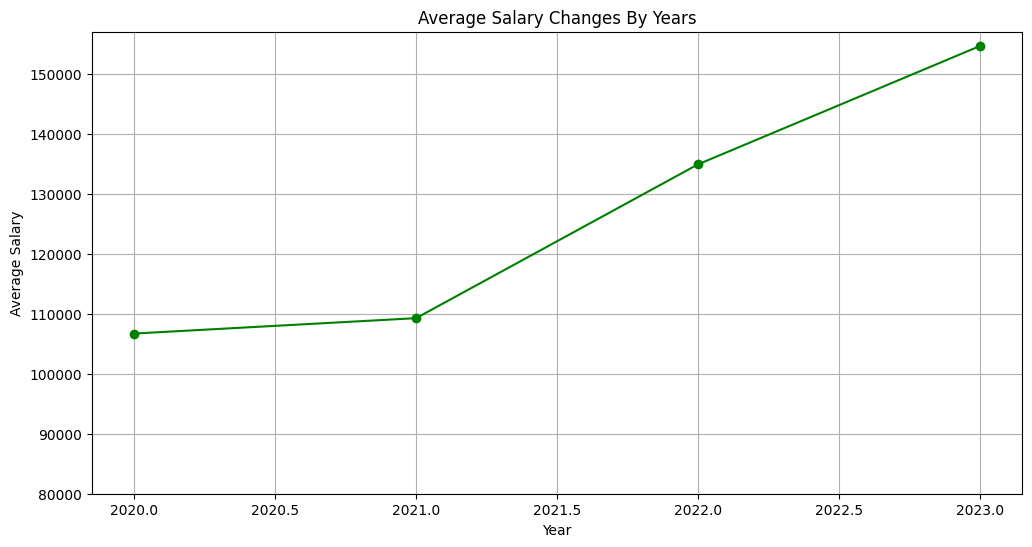

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(average_salary_by_year.index, average_salary_by_year, marker='o', color='green', linestyle='-')
plt.title('Average Salary Changes By Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.ylim(80000)
plt.grid(True)
plt.show()

#### Average salary changes by years in Canada

In [17]:
average_salary_by_year_canada = canada_df.groupby('work_year')['salary'].mean().sort_index()
average_salary_by_year_canada

work_year
2020     77333.333333
2021    130727.272727
2022    134865.789474
2023    154247.603448
Name: salary, dtype: float64

### Average Salaries by Company Size

In [18]:
average_salary_by_company_size = df.groupby('company_size')['salary'].mean().sort_values()
average_salary_by_company_size

company_size
S     92666.547170
L    142949.259358
M    151623.607718
Name: salary, dtype: float64

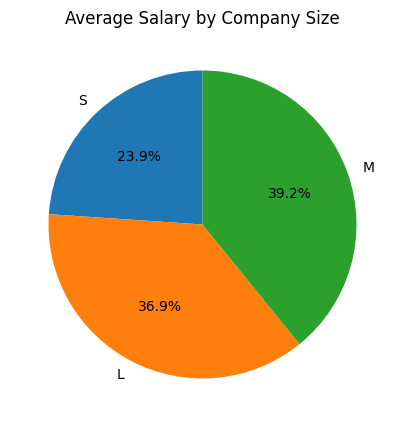

In [19]:
plt.figure(figsize=(5, 5))
plt.pie(average_salary_by_company_size, labels=average_salary_by_company_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Salary by Company Size')
plt.show()

#### Average Salaries by Company Size in Canada

In [20]:
average_salary_by_company_size_canada = canada_df.groupby('company_size')['salary'].mean().sort_values()
average_salary_by_company_size_canada

company_size
L    116921.571429
S    148000.000000
M    153472.430052
Name: salary, dtype: float64

### Average Salary by Job Category

In [21]:
average_salary_by_job_category = df.groupby('job_category')['salary'].mean().sort_values()
average_salary_by_job_category

job_category
Data Quality and Operations       100554.363636
Data Management and Strategy      103085.950820
Data Analysis                     107801.471517
BI and Visualization              135935.840256
Leadership and Management         144164.409543
Data Engineering                  145588.369469
Cloud and Database                155000.000000
Data Architecture and Modeling    155343.891892
Data Science and Research         163401.934970
Machine Learning and AI           179338.905462
Name: salary, dtype: float64

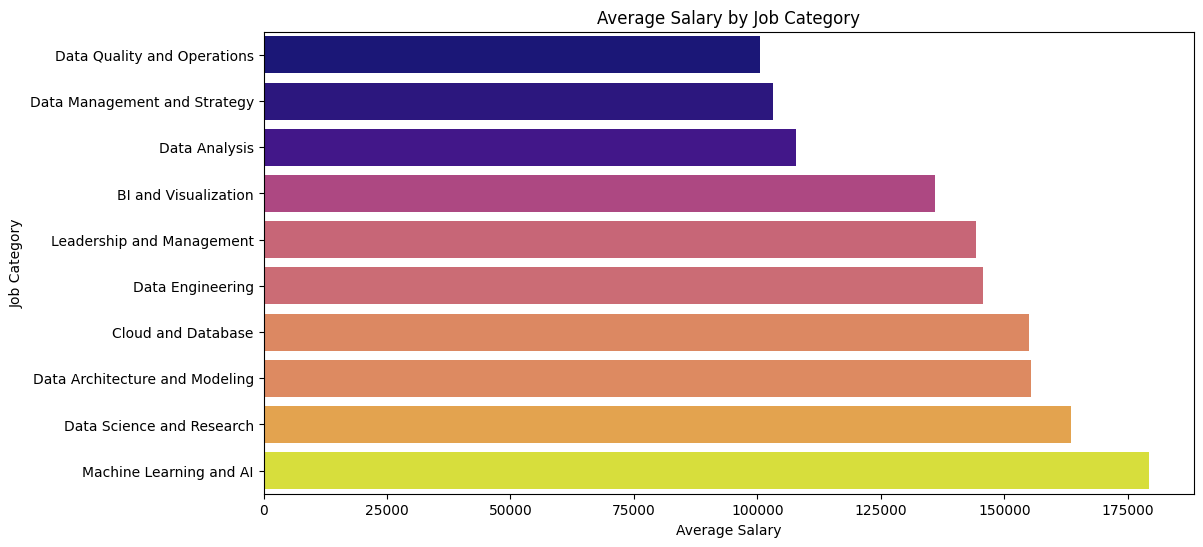

In [22]:
average_salary_by_job_category2 = df.groupby('job_category')['salary'].mean().sort_values().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='salary', y='job_category', data=average_salary_by_job_category2, palette='plasma', hue='salary', legend=False)
plt.title('Average Salary by Job Category')
plt.xlabel('Average Salary')
plt.ylabel('Job Category')
plt.show()